In [1]:
import pandas as pd 
import json
import requests
import pprint
import numpy
import seaborn as sns
import matplotlib.pyplot as plt



## Global-mean monthly, seasonal, and annual means (NASA)

https://data.giss.nasa.gov/gistemp/

In [2]:
global_temperature = pd.read_csv("https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv", skiprows=[0], names=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA'])

global_temperature

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880,-.19,-.24,-.09,-.16,-.10,-.21,-.17,-.10,-.14,-.23,-.21,-.18,-.17,***,***,-.12,-.16,-.19
1881,-.19,-.14,.03,.05,.07,-.19,.00,-.04,-.15,-.22,-.19,-.07,-.09,-.09,-.17,.05,-.07,-.19
1882,.16,.14,.05,-.17,-.14,-.23,-.16,-.07,-.14,-.23,-.16,-.36,-.11,-.08,.08,-.09,-.15,-.18
1883,-.29,-.37,-.12,-.18,-.18,-.07,-.07,-.14,-.22,-.11,-.24,-.11,-.18,-.20,-.34,-.16,-.09,-.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,.93,.95,1.17,1.02,.85,.90,.95,.95,.93,1.00,.99,1.09,.98,.96,.93,1.01,.93,.97
2020,1.17,1.24,1.17,1.13,1.01,.91,.90,.87,.98,.88,1.10,.81,1.02,1.04,1.17,1.10,.89,.99
2021,.81,.64,.89,.76,.78,.84,.92,.82,.92,1.00,.94,.86,.85,.84,.75,.81,.86,.95
2022,.91,.89,1.05,.83,.84,.92,.94,.95,.89,.96,.72,.80,.89,.90,.89,.91,.94,.86


In [3]:
global_temperature.replace('***', 0, inplace=True)

In [4]:
numeric_columns = global_temperature.columns[1:]  
global_temperature[numeric_columns] = global_temperature[numeric_columns].apply(pd.to_numeric, errors='coerce')


## Sea Level (Copernic)
https://marine.copernicus.eu/ocean-climate-portal/sea-level

In [5]:
sea_level = pd.read_csv("/Users/swell/Downloads/Global - area-averaged monthly anomalies - Sea Level.csv")
sea_level

,date,- values
0,1993-01-01,-0.002025
1,1993-01-02,-0.002048
2,1993-01-03,-0.001960
3,1993-01-04,-0.002515
4,1993-01-05,-0.001863
...,...,...
10803,2022-07-31,0.103925
10804,2022-08-01,0.104094
10805,2022-08-02,0.104301
10806,2022-08-03,0.104413


In [6]:
sea_level.columns

Index(['date', ' - values'], dtype='object')

In [7]:
sea_level.rename(columns= {' - values' : 'values'}, inplace = True)
sea_level

,date,values
0,1993-01-01,-0.002025
1,1993-01-02,-0.002048
2,1993-01-03,-0.001960
3,1993-01-04,-0.002515
4,1993-01-05,-0.001863
...,...,...
10803,2022-07-31,0.103925
10804,2022-08-01,0.104094
10805,2022-08-02,0.104301
10806,2022-08-03,0.104413


In [8]:
sea_level['year'] = sea_level['date'].astype(str).str[:4]
sea_level

,date,values,year
0,1993-01-01,-0.002025,1993
1,1993-01-02,-0.002048,1993
2,1993-01-03,-0.001960,1993
3,1993-01-04,-0.002515,1993
4,1993-01-05,-0.001863,1993
...,...,...,...
10803,2022-07-31,0.103925,2022
10804,2022-08-01,0.104094,2022
10805,2022-08-02,0.104301,2022
10806,2022-08-03,0.104413,2022


In [9]:
sea_level_by_year = sea_level.groupby('year')['values'].mean().reset_index()
sea_level_by_year

,year,values
0,1993,0.000287
1,1994,0.001708
2,1995,0.004045
3,1996,0.007542
4,1997,0.011777
5,1998,0.015253
6,1999,0.017480
7,2000,0.020939
8,2001,0.025363
9,2002,0.028402


In [10]:
sea_level_average = pd.DataFrame(sea_level_by_year, columns=['year', 'values'])

In [11]:
sea_level_average

,year,values
0,1993,0.000287
1,1994,0.001708
2,1995,0.004045
3,1996,0.007542
4,1997,0.011777
5,1998,0.015253
6,1999,0.017480
7,2000,0.020939
8,2001,0.025363
9,2002,0.028402


Text(0.5, 0, 'Year')

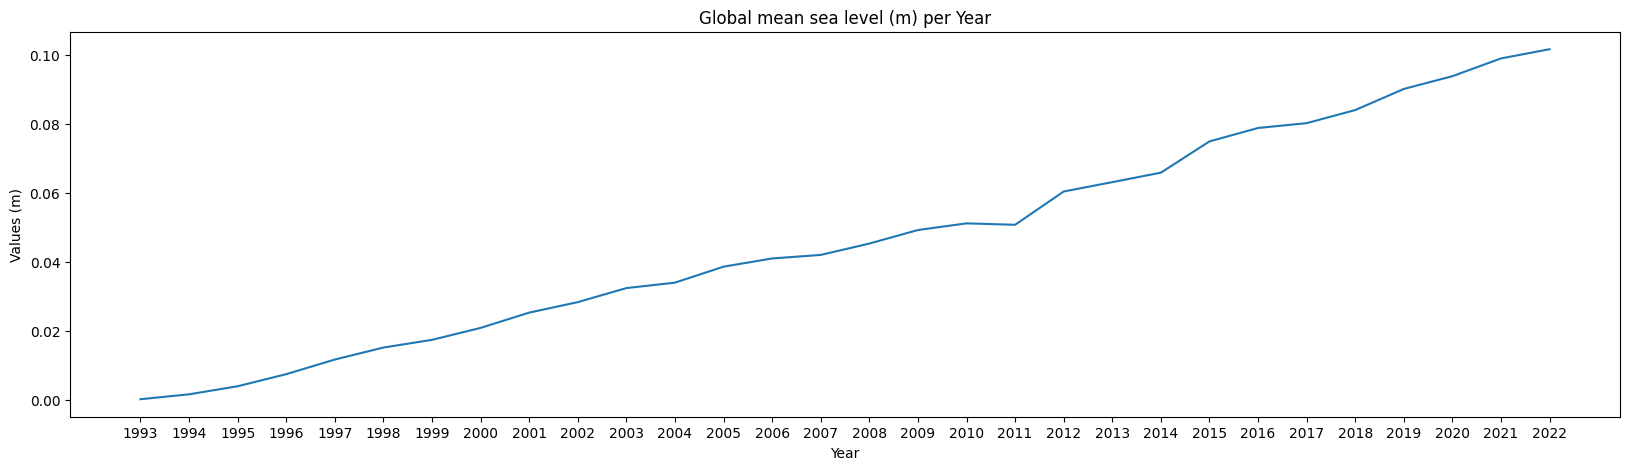

In [12]:
fig, ax= plt.subplots(figsize=(20, 5))
sns.lineplot(data = sea_level_average, x = "year", y = "values", ax=ax)

titre = "Global mean sea level (m) per Year"
ax.set_title(titre)
ax.set_ylabel("Values (m)")
ax.set_xlabel("Year")

In [13]:
sea_level_average.to_csv(r'sea_level.csv', encoding = 'utf-8-sig', index = False)

In [14]:
#files.download('df_talentify.csv')

## Sea Temperature (Copernic)

In [15]:
sea_temperature = pd.read_csv("/Users/swell/Downloads/Global - area-averaged monthly anomalies - Sea Surface Temperature from reprocessed observations.csv")
sea_temperature

,date,- values
0,1993-01-15,-0.177995
1,1993-02-15,-0.176136
2,1993-03-15,-0.131704
3,1993-04-15,-0.124919
4,1993-05-15,-0.115371
...,...,...
343,2021-08-15,0.217957
344,2021-09-15,0.211087
345,2021-10-15,0.233332
346,2021-11-15,0.254932


In [16]:
sea_temperature.rename(columns= {' - values' : 'values'}, inplace = True)
sea_temperature

,date,values
0,1993-01-15,-0.177995
1,1993-02-15,-0.176136
2,1993-03-15,-0.131704
3,1993-04-15,-0.124919
4,1993-05-15,-0.115371
...,...,...
343,2021-08-15,0.217957
344,2021-09-15,0.211087
345,2021-10-15,0.233332
346,2021-11-15,0.254932


In [17]:
sea_temperature.dtypes

date       object
values    float64
dtype: object

In [18]:
sea_temperature['year'] = sea_temperature['date'].astype(str).str[:4]
sea_temperature

,date,values,year
0,1993-01-15,-0.177995,1993
1,1993-02-15,-0.176136,1993
2,1993-03-15,-0.131704,1993
3,1993-04-15,-0.124919,1993
4,1993-05-15,-0.115371,1993
...,...,...,...
343,2021-08-15,0.217957,2021
344,2021-09-15,0.211087,2021
345,2021-10-15,0.233332,2021
346,2021-11-15,0.254932,2021


In [19]:
sea_temperature = sea_temperature.groupby('year')['values'].mean().reset_index()
sea_temperature

,year,values
0,1993,-0.176960
1,1994,-0.155485
2,1995,-0.101494
3,1996,-0.153508
4,1997,0.014385
5,1998,0.074184
6,1999,-0.120130
7,2000,-0.069116
8,2001,0.004905
9,2002,0.034734


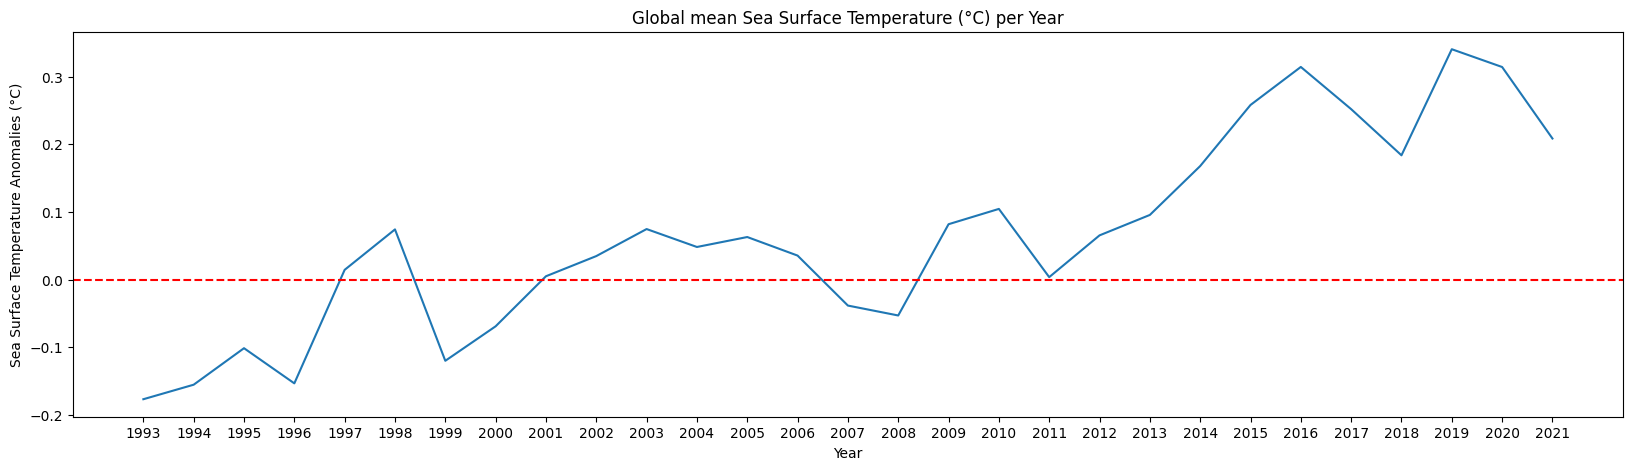

In [20]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = sea_temperature, x = "year", y = "values", ax = ax)

titre = "Global mean Sea Surface Temperature (°C) per Year"
ax.set_title(titre)
ax.set_ylabel("Sea Surface Temperature Anomalies (°C)")
ax.set_xlabel("Year")

ax.axhline(y=0, color='red', linestyle='--', label='Zero Anomaly')


In [21]:
sea_temperature.to_csv(r'sea_temperature.csv', encoding = 'utf-8-sig', index = False)

## Ocean Carbon Uptake

https://marine.copernicus.eu/ocean-climate-portal/ocean-carbon-uptake

In [22]:
ocean_carbon = pd.read_csv("/Users/swell/Downloads/Global - carbon co2 flux integrated annual mean (surface) - downward flux of total CO2 from reprocessed observations.csv")

In [23]:
ocean_carbon

,date,- values,- uncertainties
0,1985-06-30,0.713497,0.177115
1,1986-06-30,0.775767,0.160578
2,1987-06-30,0.953450,0.157221
3,1988-06-30,0.996321,0.167815
4,1989-06-30,0.962103,0.138971
5,1990-06-30,1.050946,0.127171
6,1991-06-30,1.220443,0.104784
7,1992-06-30,1.163306,0.123727
8,1993-06-30,1.274554,0.125183
9,1994-06-30,1.314470,0.131710


In [24]:
ocean_carbon.rename(columns= {' - values' : 'values', ' - uncertainties' : 'uncertainties'}, inplace = True)
ocean_carbon

,date,values,uncertainties
0,1985-06-30,0.713497,0.177115
1,1986-06-30,0.775767,0.160578
2,1987-06-30,0.953450,0.157221
3,1988-06-30,0.996321,0.167815
4,1989-06-30,0.962103,0.138971
5,1990-06-30,1.050946,0.127171
6,1991-06-30,1.220443,0.104784
7,1992-06-30,1.163306,0.123727
8,1993-06-30,1.274554,0.125183
9,1994-06-30,1.314470,0.131710


ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

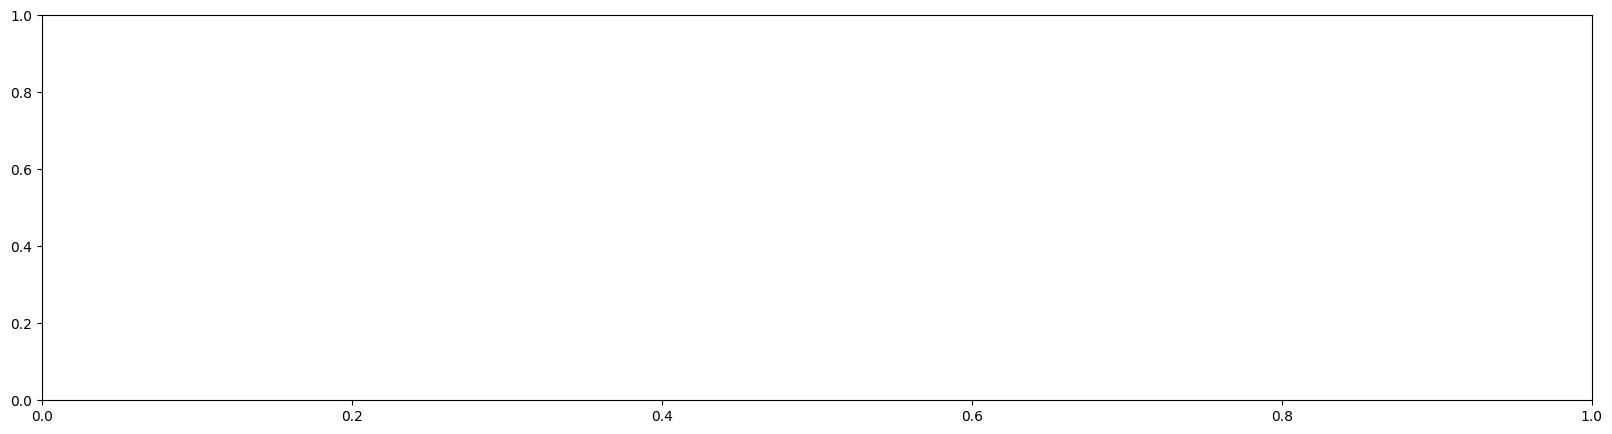

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = ocean_carbon, x = "year", y = "values", ax = ax)

titre = "Global Yearly Ocean CO2 Uptake (PgC)"
ax.set_title(titre)
ax.set_ylabel("Global carbon Co2 flux integrated mean (surface)")
ax.set_xlabel("Year")

In [ ]:
ocean_carbon.to_csv(r'ocean_carbon.csv', encoding = 'utf-8-sig', index = False)

## Arctic Sea Ice Extent
https://marine.copernicus.eu/ocean-climate-portal/arctic-sea-ice-extent

In [ ]:
ArticSeaExtent = pd.read_csv("/Users/swell/Downloads/Arctic Ocean - monthly mean - Monthly Sea Ice Extent for reprocessed observations.csv")
ArticSeaExtent

,date,- values
0,1979-01-15,15565635.0
1,1979-02-15,16287846.0
2,1979-03-15,16444950.0
3,1979-04-15,15619396.0
4,1979-05-15,14086220.0
...,...,...
511,2021-08-15,6320655.0
512,2021-09-15,5569146.0
513,2021-10-15,7325262.0
514,2021-11-15,10130229.0


In [ ]:
ArticSeaExtent.rename(columns= {' - values' : 'values'}, inplace = True)


In [ ]:
ArticSeaExtent['year'] = ArticSeaExtent['date'].astype(str).str[:4]

In [ ]:
ArticSeaExtent = ArticSeaExtent.groupby('year')['values'].mean().reset_index()

In [ ]:
ArticSeaExtent

,year,values
0,1979,1.261627e+07
1,1980,1.267548e+07
2,1981,1.251235e+07
3,1982,1.277872e+07
4,1983,1.263143e+07
5,1984,1.218777e+07
6,1985,1.230830e+07
7,1986,1.208636e+07
8,1987,1.242207e+07
9,1988,1.240728e+07


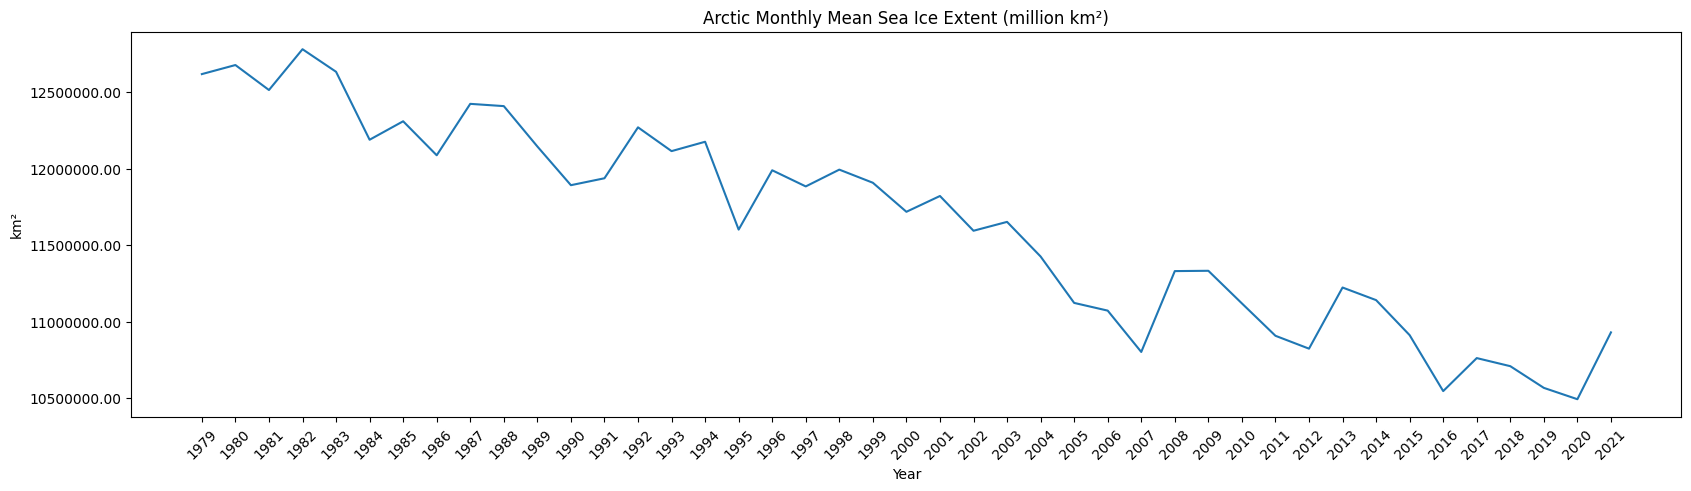

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=ArticSeaExtent, x="year", y="values", ax=ax)

# Ajoutez un titre et des étiquettes d'axe
titre = "Arctic Monthly Mean Sea Ice Extent (million km²)"
ax.set_title(titre)
ax.set_ylabel("km²")
ax.set_xlabel("Year")

# Définissez une fonction pour formater les étiquettes de l'axe y avec une précision de deux chiffres après la virgule
def format_y_axis(value, _):
    return f"{value:.2f}"

# Appliquez la fonction de formatage à l'axe y
ax.yaxis.set_major_formatter(FuncFormatter(format_y_axis))
ax.tick_params(axis='x', rotation=45)


plt.show()




In [ ]:
ArticSeaExtent.to_csv(r'ArticSeaExtent.csv', encoding = 'utf-8-sig', index = False)

## Antarctic Sea Ice Extent 
https://marine.copernicus.eu/ocean-climate-portal/antarctic-sea-ice-extent


In [ ]:
AntarticSeaExtent = pd.read_csv("/Users/swell/Downloads/Antarctic Ocean - monthly mean - Monthly Sea Ice Extent for reprocessed observations.csv")

In [ ]:
AntarticSeaExtent

,date,- values
0,1979-01-15,5783145.00
1,1979-02-15,3423459.75
2,1979-03-15,4351361.00
3,1979-04-15,7773291.50
4,1979-05-15,11271069.00
...,...,...
511,2021-08-15,18627056.00
512,2021-09-15,18874124.00
513,2021-10-15,18106130.00
514,2021-11-15,15533146.00


In [ ]:
AntarticSeaExtent.rename(columns= {' - values' : 'values'}, inplace = True)

In [ ]:
AntarticSeaExtent['year'] = AntarticSeaExtent['date'].astype(str).str[:4]

In [ ]:
AntarticSeaExtent = AntarticSeaExtent.groupby('year')['values'].mean().reset_index()

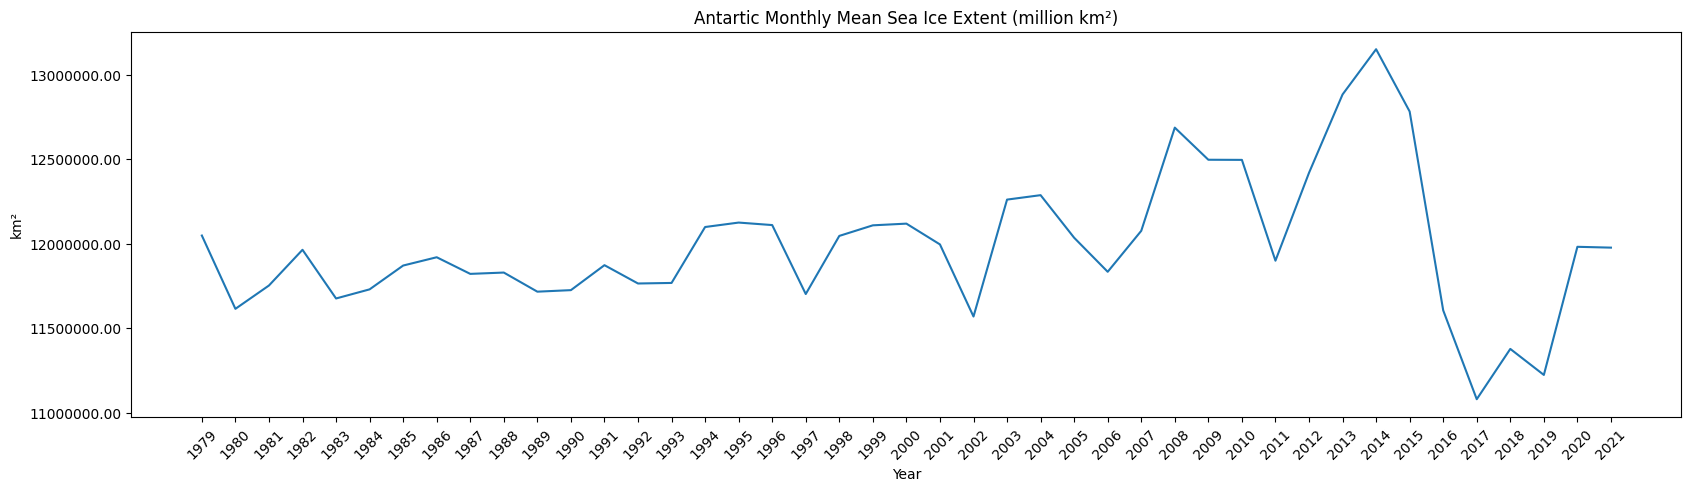

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=AntarticSeaExtent, x="year", y="values", ax=ax)

# Ajoutez un titre et des étiquettes d'axe
titre = "Antartic Monthly Mean Sea Ice Extent (million km²)"
ax.set_title(titre)
ax.set_ylabel("km²")
ax.set_xlabel("Year")

# Définissez une fonction pour formater les étiquettes de l'axe y avec une précision de deux chiffres après la virgule
def format_y_axis(value, _):
    return f"{value:.2f}"

# Appliquez la fonction de formatage à l'axe y
ax.yaxis.set_major_formatter(FuncFormatter(format_y_axis))
ax.tick_params(axis='x', rotation=45)


plt.show()

In [ ]:
AntarticSeaExtent.to_csv(r'AntarticSeaExtent.csv', encoding = 'utf-8-sig', index = False)

## Climate Change Indicators Dashboard
https://climatedata.imf.org/datasets/4063314923d74187be9596f10d034914/explore


In [ ]:
annual_surface_temperature_change = pd.read_csv("/Users/swell/Downloads/Annual_Surface_Temperature_Change.csv")

In [ ]:
annual_surface_temperature_change

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [ ]:
annual_surface_temperature_change.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

## World Monthly Atmospheric Carbon Dioxide Concentrations
https://climatedata.imf.org/datasets/9c3764c0efcc4c71934ab3988f219e0e/explore

In [ ]:
atmospheric_concentrations = pd.read_csv("/Users/swell/Downloads/Atmospheric_CO%E2%82%82_Concentrations.csv")
atmospheric_concentrations

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M03,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M06,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M07,315.86
...,...,...,...,...,...,...,...,...,...,...,...,...
1559,1560,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",2023M08,0.61
1560,1561,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",2023M09,418.51
1561,1562,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",2023M09,0.63
1562,1563,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",2023M10,418.82


In [ ]:
atmospheric_concentrations['Country'].unique()

array(['World'], dtype=object)

## Climate-related Disasters Frequency

In [ ]:
disasters_frequency = pd.read_csv("/Users/swell/Downloads/Climate-related_Disasters_Frequency.csv")
disasters_frequency

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,Zambia,ZM,ZMB,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0
966,967,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
967,968,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
968,969,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0


## THE NOAA ANNUAL GREENHOUSE GAS INDEX (AGGI)
https://www.climate.gov/news-features/understanding-climate/climate-change-annual-greenhouse-gas-index


Global Radiative Forcing 1979 - 2022 (W m-2)	

In [ ]:
annual_greenhouse_gas_index = pd.read_csv("https://gml.noaa.gov/aggi/AGGI_Table.csv",skiprows=2)
annual_greenhouse_gas_index

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
0,1979,1.025,0.500,0.088,0.175,0.008,0.001,1.798,388.0,0.787,NaN
1,1980,1.058,0.509,0.088,0.185,0.009,0.001,1.850,392.0,0.810,2.3
2,1981,1.076,0.517,0.091,0.195,0.010,0.001,1.890,395.0,0.827,1.8
3,1982,1.088,0.525,0.095,0.205,0.011,0.001,1.924,397.0,0.842,1.5
4,1983,1.114,0.528,0.097,0.215,0.012,0.001,1.967,400.0,0.861,1.9
5,1984,1.138,0.532,0.100,0.225,0.013,0.002,2.009,403.0,0.879,1.8
6,1985,1.161,0.538,0.101,0.236,0.014,0.002,2.051,407.0,0.898,1.8
7,1986,1.182,0.544,0.105,0.247,0.015,0.002,2.095,410.0,0.917,1.9
8,1987,1.208,0.550,0.104,0.260,0.016,0.002,2.140,413.0,0.937,2.0
9,1988,1.247,0.555,0.106,0.275,0.017,0.002,2.201,418.0,0.963,2.7


In [ ]:
annual_greenhouse_gas_index.dropna(inplace = True)


In [ ]:
annual_greenhouse_gas_index

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
1,1980,1.058,0.509,0.088,0.185,0.009,0.001,1.850,392.0,0.810,2.3
2,1981,1.076,0.517,0.091,0.195,0.010,0.001,1.890,395.0,0.827,1.8
3,1982,1.088,0.525,0.095,0.205,0.011,0.001,1.924,397.0,0.842,1.5
4,1983,1.114,0.528,0.097,0.215,0.012,0.001,1.967,400.0,0.861,1.9
5,1984,1.138,0.532,0.100,0.225,0.013,0.002,2.009,403.0,0.879,1.8
6,1985,1.161,0.538,0.101,0.236,0.014,0.002,2.051,407.0,0.898,1.8
7,1986,1.182,0.544,0.105,0.247,0.015,0.002,2.095,410.0,0.917,1.9
8,1987,1.208,0.550,0.104,0.260,0.016,0.002,2.140,413.0,0.937,2.0
9,1988,1.247,0.555,0.106,0.275,0.017,0.002,2.201,418.0,0.963,2.7
10,1989,1.271,0.560,0.110,0.287,0.018,0.003,2.248,422.0,0.984,2.0


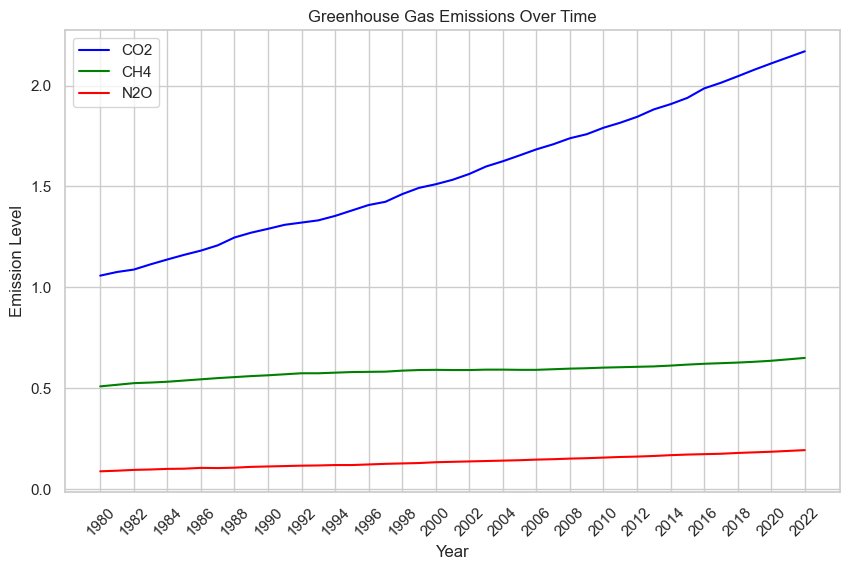

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

normalized_data = annual_greenhouse_gas_index.copy()
normalized_data.iloc[:, 2:] = annual_greenhouse_gas_index.iloc[:, 2:] / annual_greenhouse_gas_index.iloc[:, 2:].max()

# Utilisez cette ligne pour chaque gaz à effet de serre que vous souhaitez inclure dans le graphique
sns.lineplot(data=annual_greenhouse_gas_index, x="Year", y="CO2", label="CO2", color="blue")
sns.lineplot(data=annual_greenhouse_gas_index, x="Year", y="CH4", label="CH4", color="green")
sns.lineplot(data=annual_greenhouse_gas_index, x="Year", y="N2O", label="N2O", color="red")


# Ajoutez des lignes similaires pour les autres gaz à effet de serre

plt.xlabel("Year")
plt.ylabel("Emission Level")
plt.title("Greenhouse Gas Emissions Over Time")
plt.xticks(rotation = 45)
plt.xticks(annual_greenhouse_gas_index["Year"][::2])  # Affiche chaque deux ans pour éviter le chevauchement

plt.legend()
plt.show()

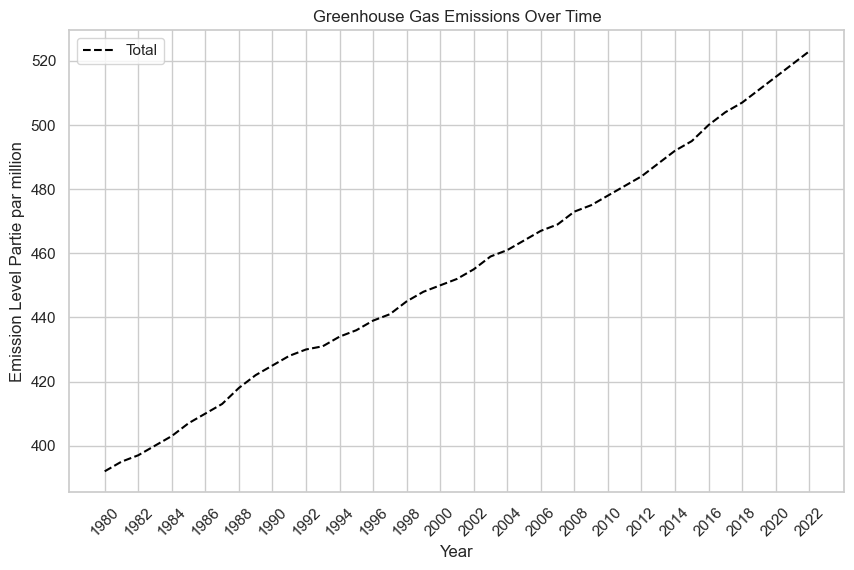

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data= annual_greenhouse_gas_index, x="Year", y="Total.1", label="Total", color="black", linestyle="--")

plt.xlabel("Year")
plt.ylabel("Emission Level Partie par million")
plt.title("Greenhouse Gas Emissions Over Time")
plt.xticks(rotation = 45)
plt.xticks(annual_greenhouse_gas_index["Year"][::2])  # Affiche chaque deux ans pour éviter le chevauchement

plt.legend()
plt.show()


In [ ]:
annual_greenhouse_gas_index.to_csv(r'annual_greenhouse_gas_index', encoding = 'utf-8-sig', index = False)

## Climate watch 

https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=climate-watch&historical-emissions-gases=all-ghg&historical-emissions-regions=TOP&historical-emissions-sectors=All%20Selected&page=1&sort_col=sector&sort_dir=ASC

In [ ]:
historical_emission2 = pd.read_csv('/Users/swell/Downloads/historical_emissions-2/historical_emissions.csv')
historical_emission2

,ISO,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,AFG,Afghanistan,Climate Watch,Building,CO2,MtCO₂e,2.36,2.38,2.17,2.22,...,0.17,0.17,0.17,0.17,0.16,0.16,0.16,0.15,0.14,0.13
1,AGO,Angola,Climate Watch,Building,CO2,MtCO₂e,3.02,3.71,3.24,3.50,...,1.25,1.00,0.91,0.90,0.66,0.62,0.51,0.61,0.67,0.63
2,ALB,Albania,Climate Watch,Building,CO2,MtCO₂e,0.46,0.48,0.47,0.46,...,0.24,0.24,0.33,0.34,0.25,0.16,0.17,0.28,0.36,0.31
3,AND,Andorra,Climate Watch,Building,CO2,MtCO₂e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Climate Watch,Building,CO2,MtCO₂e,0.53,0.57,0.80,1.01,...,0.27,0.26,0.26,0.25,0.29,0.29,0.26,0.27,0.29,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,WSM,Samoa,Climate Watch,Transportation,CO2,MtCO₂e,0.12,0.16,0.15,0.14,...,0.09,0.09,0.08,0.08,0.08,0.07,0.07,0.06,0.05,0.05
2336,YEM,Yemen,Climate Watch,Transportation,CO2,MtCO₂e,2.71,3.06,3.04,2.44,...,4.51,4.08,3.78,3.76,3.96,4.45,4.41,5.41,5.13,4.01
2337,ZAF,South Africa,Climate Watch,Transportation,CO2,MtCO₂e,45.04,53.29,55.60,56.21,...,35.36,34.89,35.23,34.32,35.17,31.33,30.23,30.06,29.57,29.55
2338,ZMB,Zambia,Climate Watch,Transportation,CO2,MtCO₂e,2.49,2.66,2.09,2.05,...,0.67,0.70,0.73,0.63,0.81,0.81,0.66,0.93,0.97,0.77


In [ ]:
historical_emission3 = pd.read_csv('/Users/swell/Downloads/historical_emissions-3/historical_emissions.csv')
historical_emission3

,ISO,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,AFG,Afghanistan,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,31.12,32.74,32.58,31.75,...,15.98,15.06,14.22,13.23,12.18,11.73,11.68,11.55,11.90,11.63
1,AFG,Afghanistan,Climate Watch,Total including LUCF,All GHG,MtCO₂e,31.27,32.89,32.74,31.91,...,13.59,12.68,11.83,10.84,9.79,9.34,9.29,9.16,9.51,9.24
2,AFG,Afghanistan,Climate Watch,Energy,All GHG,MtCO₂e,10.89,13.43,13.13,12.18,...,1.16,1.36,1.38,1.45,1.50,1.57,1.64,1.68,2.14,2.28
3,AFG,Afghanistan,Climate Watch,Industrial Processes,All GHG,MtCO₂e,1.38,1.21,1.08,0.91,...,0.12,0.11,0.10,0.08,0.07,0.06,0.06,0.06,0.06,0.05
4,AFG,Afghanistan,Climate Watch,Agriculture,All GHG,MtCO₂e,15.15,14.48,14.84,15.21,...,12.79,11.75,10.95,9.98,8.95,8.52,8.48,8.40,8.39,8.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,ZWE,Zimbabwe,Climate Watch,Building,All GHG,MtCO₂e,2.77,2.77,2.74,2.69,...,2.72,2.42,2.50,2.47,2.55,2.46,2.59,2.57,2.64,2.58
2712,ZWE,Zimbabwe,Climate Watch,Manufacturing/Construction,All GHG,MtCO₂e,1.03,1.10,1.16,1.10,...,3.13,2.41,2.30,2.52,2.65,2.41,3.90,4.64,5.02,4.78
2713,ZWE,Zimbabwe,Climate Watch,Transportation,All GHG,MtCO₂e,2.14,2.60,2.93,2.28,...,3.22,2.18,2.19,2.19,2.23,1.80,2.03,2.28,1.63,2.16
2714,ZWE,Zimbabwe,Climate Watch,Other Fuel Combustion,All GHG,MtCO₂e,0.75,0.93,0.94,0.80,...,2.60,2.53,2.49,2.65,2.22,2.32,2.06,1.73,1.82,1.62


In [ ]:
agriculture_emission = pd.read_csv("Datathon/agriculture/historical_emissions.csv")
agriculture_emission

,ISO,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,AFG,Afghanistan,Climate Watch,Agriculture,All GHG,MtCO₂e,15.15,14.48,14.84,15.21,...,12.79,11.75,10.95,9.98,8.95,8.52,8.48,8.40,8.39,8.07
1,AGO,Angola,Climate Watch,Agriculture,All GHG,MtCO₂e,34.10,36.10,32.28,36.00,...,27.47,29.63,26.79,27.16,29.96,30.07,30.09,30.22,30.12,30.04
2,ALB,Albania,Climate Watch,Agriculture,All GHG,MtCO₂e,2.59,2.85,2.98,3.14,...,3.67,3.66,3.76,4.03,4.35,4.29,3.40,3.18,3.25,3.56
3,AND,Andorra,Climate Watch,Agriculture,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ARE,United Arab Emirates,Climate Watch,Agriculture,All GHG,MtCO₂e,2.08,2.06,2.04,2.03,...,1.05,0.98,0.93,0.89,0.83,0.78,0.71,0.67,0.60,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,WSM,Samoa,Climate Watch,Agriculture,All GHG,MtCO₂e,0.17,0.14,0.19,0.18,...,0.15,0.15,0.14,0.14,0.14,0.15,0.14,0.14,0.15,0.15
190,YEM,Yemen,Climate Watch,Agriculture,All GHG,MtCO₂e,7.98,8.24,7.33,7.80,...,5.48,5.39,5.15,4.87,4.71,4.64,4.68,4.60,4.50,4.76
191,ZAF,South Africa,Climate Watch,Agriculture,All GHG,MtCO₂e,28.59,28.73,29.53,30.74,...,33.06,33.33,32.64,32.21,30.70,30.92,31.65,31.91,32.55,32.37
192,ZMB,Zambia,Climate Watch,Agriculture,All GHG,MtCO₂e,22.11,22.80,21.88,22.13,...,18.54,19.94,18.20,18.02,19.49,19.77,20.19,20.36,20.24,20.09


In [ ]:
bunkerfuels_emission = pd.read_csv('Datathon/BunkerFuels/bunkerfuels.csv')
bunkerfuels_emission

,ISO,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,AFG,Afghanistan,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.02,0.03,0.17,0.19,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
1,AGO,Angola,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,1.41,1.98,2.00,2.04,...,1.20,0.69,1.07,1.06,1.22,1.35,0.95,0.84,0.92,1.06
2,ALB,Albania,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.15,0.16,0.12,0.14,...,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,AND,Andorra,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,66.06,75.70,75.58,76.87,...,42.14,43.97,44.17,43.48,44.12,44.22,41.05,40.22,40.36,29.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,WSM,Samoa,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.03,0.04,0.04,0.04,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
190,YEM,Yemen,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.30,0.33,0.33,0.32,...,0.52,0.60,0.60,0.59,0.60,0.60,0.62,1.45,1.19,1.44
191,ZAF,South Africa,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,10.04,12.97,12.97,13.82,...,13.32,12.11,10.39,12.36,12.12,10.07,9.32,9.92,7.79,7.19
192,ZMB,Zambia,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.02,0.04,0.03,0.06,...,0.11,0.09,0.08,0.09,0.10,0.11,0.11,0.12,0.11,0.20


## Long, Lat countries 
https://gist.github.com/metal3d/5b925077e66194551df949de64e910f6


In [ ]:
LongLat = pd.read_csv("https://gist.githubusercontent.com/metal3d/5b925077e66194551df949de64e910f6/raw/c5f20a037409d96958553e2eb6b8251265c6fd63/country-coord.csv")

In [ ]:
LongLat

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6
...,...,...,...,...,...,...
239,Wallis and Futuna,WF,WLF,876,-13.3000,-176.2
240,Western Sahara,EH,ESH,732,24.5000,-13.0
241,Yemen,YE,YEM,887,15.0000,48.0
242,Zambia,ZM,ZMB,894,-15.0000,30.0


In [ ]:
LongLat.rename(columns = {"Alpha-3 code" : "ISO", "Country" : "Pays"}, inplace = True)

In [ ]:
LongLat

,Pays,Alpha-2 code,ISO,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6
...,...,...,...,...,...,...
239,Wallis and Futuna,WF,WLF,876,-13.3000,-176.2
240,Western Sahara,EH,ESH,732,24.5000,-13.0
241,Yemen,YE,YEM,887,15.0000,48.0
242,Zambia,ZM,ZMB,894,-15.0000,30.0


## DATAFRAME AGRICULTURE GREENHOUSE GAS WITH LONG/LAT

In [ ]:
agriculture_co2 = pd.concat([agriculture_emission.set_index("ISO"), LongLat.set_index("ISO")], axis=1, join="outer")
agriculture_co2

,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,2016,...,1994,1993,1992,1991,1990,Pays,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,Climate Watch,Agriculture,All GHG,MtCO₂e,15.15,14.48,14.84,15.21,15.30,...,8.52,8.48,8.40,8.39,8.07,Afghanistan,AF,4.0,33.0000,65.0000
AGO,Angola,Climate Watch,Agriculture,All GHG,MtCO₂e,34.10,36.10,32.28,36.00,35.34,...,30.07,30.09,30.22,30.12,30.04,Angola,AO,24.0,-12.5000,18.5000
ALB,Albania,Climate Watch,Agriculture,All GHG,MtCO₂e,2.59,2.85,2.98,3.14,3.22,...,4.29,3.40,3.18,3.25,3.56,Albania,AL,8.0,41.0000,20.0000
AND,Andorra,Climate Watch,Agriculture,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,Andorra,AD,20.0,42.5000,1.6000
ARE,United Arab Emirates,Climate Watch,Agriculture,All GHG,MtCO₂e,2.08,2.06,2.04,2.03,1.99,...,0.78,0.71,0.67,0.60,0.54,United Arab Emirates,AE,784.0,24.0000,54.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,United States Minor Outlying Islands,UM,581.0,19.2833,166.6000
VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Virgin Islands, British",VG,92.0,18.5000,-64.5000
VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Virgin Islands, U.S.",VI,850.0,18.3333,-64.8333


In [ ]:
agriculture_co2.dropna(inplace=True)

In [ ]:
agriculture_co2.reset_index(inplace=True)

In [ ]:
agriculture_co2

,ISO,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,...,1994,1993,1992,1991,1990,Pays,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
0,AFG,Afghanistan,Climate Watch,Agriculture,All GHG,MtCO₂e,15.15,14.48,14.84,15.21,...,8.52,8.48,8.40,8.39,8.07,Afghanistan,AF,4.0,33.0000,65.0000
1,AGO,Angola,Climate Watch,Agriculture,All GHG,MtCO₂e,34.10,36.10,32.28,36.00,...,30.07,30.09,30.22,30.12,30.04,Angola,AO,24.0,-12.5000,18.5000
2,ALB,Albania,Climate Watch,Agriculture,All GHG,MtCO₂e,2.59,2.85,2.98,3.14,...,4.29,3.40,3.18,3.25,3.56,Albania,AL,8.0,41.0000,20.0000
3,AND,Andorra,Climate Watch,Agriculture,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,Andorra,AD,20.0,42.5000,1.6000
4,ARE,United Arab Emirates,Climate Watch,Agriculture,All GHG,MtCO₂e,2.08,2.06,2.04,2.03,...,0.78,0.71,0.67,0.60,0.54,United Arab Emirates,AE,784.0,24.0000,54.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,WSM,Samoa,Climate Watch,Agriculture,All GHG,MtCO₂e,0.17,0.14,0.19,0.18,...,0.15,0.14,0.14,0.15,0.15,Samoa,WS,882.0,-13.5833,-172.3333
185,YEM,Yemen,Climate Watch,Agriculture,All GHG,MtCO₂e,7.98,8.24,7.33,7.80,...,4.64,4.68,4.60,4.50,4.76,Yemen,YE,887.0,15.0000,48.0000
186,ZAF,South Africa,Climate Watch,Agriculture,All GHG,MtCO₂e,28.59,28.73,29.53,30.74,...,30.92,31.65,31.91,32.55,32.37,South Africa,ZA,710.0,-29.0000,24.0000
187,ZMB,Zambia,Climate Watch,Agriculture,All GHG,MtCO₂e,22.11,22.80,21.88,22.13,...,19.77,20.19,20.36,20.24,20.09,Zambia,ZM,894.0,-15.0000,30.0000


In [ ]:
colonnes_a_supprimer = ['Data source', 'Alpha-2 code', 'Numeric code', 'Pays']
agriculture_co2.drop(columns=colonnes_a_supprimer, inplace= True)


In [ ]:
agriculture_co2

,ISO,Country,Sector,Gas,Unit,2020,2019,2018,2017,2016,...,1997,1996,1995,1994,1993,1992,1991,1990,Latitude (average),Longitude (average)
0,AFG,Afghanistan,Agriculture,All GHG,MtCO₂e,15.15,14.48,14.84,15.21,15.30,...,10.95,9.98,8.95,8.52,8.48,8.40,8.39,8.07,33.0000,65.0000
1,AGO,Angola,Agriculture,All GHG,MtCO₂e,34.10,36.10,32.28,36.00,35.34,...,26.79,27.16,29.96,30.07,30.09,30.22,30.12,30.04,-12.5000,18.5000
2,ALB,Albania,Agriculture,All GHG,MtCO₂e,2.59,2.85,2.98,3.14,3.22,...,3.76,4.03,4.35,4.29,3.40,3.18,3.25,3.56,41.0000,20.0000
3,AND,Andorra,Agriculture,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.5000,1.6000
4,ARE,United Arab Emirates,Agriculture,All GHG,MtCO₂e,2.08,2.06,2.04,2.03,1.99,...,0.93,0.89,0.83,0.78,0.71,0.67,0.60,0.54,24.0000,54.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,WSM,Samoa,Agriculture,All GHG,MtCO₂e,0.17,0.14,0.19,0.18,0.19,...,0.14,0.14,0.14,0.15,0.14,0.14,0.15,0.15,-13.5833,-172.3333
185,YEM,Yemen,Agriculture,All GHG,MtCO₂e,7.98,8.24,7.33,7.80,7.87,...,5.15,4.87,4.71,4.64,4.68,4.60,4.50,4.76,15.0000,48.0000
186,ZAF,South Africa,Agriculture,All GHG,MtCO₂e,28.59,28.73,29.53,30.74,29.13,...,32.64,32.21,30.70,30.92,31.65,31.91,32.55,32.37,-29.0000,24.0000
187,ZMB,Zambia,Agriculture,All GHG,MtCO₂e,22.11,22.80,21.88,22.13,23.49,...,18.20,18.02,19.49,19.77,20.19,20.36,20.24,20.09,-15.0000,30.0000


In [ ]:
agriculture_co2.columns

Index(['ISO', 'Country', 'Sector', 'Gas', 'Unit', '2020', '2019', '2018',
       '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009',
       '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990', 'Latitude (average)', 'Longitude (average)'],
      dtype='object')

In [ ]:
agriculture_co2.to_csv(r'agriculture_co2.csv', encoding = 'utf-8-sig', index = False)


## DATAFRAME  GREENHOUSE GAS WITH LONG/LAT

In [ ]:
bunkerfuels_co2 = pd.concat([bunkerfuels_emission.set_index("ISO"), LongLat.set_index("ISO")], axis=1, join="outer")

In [ ]:
bunkerfuels_co2

,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,2016,...,1994,1993,1992,1991,1990,Pays,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.02,0.03,0.17,0.19,0.07,...,0.02,0.02,0.02,0.02,0.02,Afghanistan,AF,4.0,33.0000,65.0000
AGO,Angola,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,1.41,1.98,2.00,2.04,2.04,...,1.35,0.95,0.84,0.92,1.06,Angola,AO,24.0,-12.5000,18.5000
ALB,Albania,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.15,0.16,0.12,0.14,0.13,...,0.00,0.00,0.00,0.00,0.00,Albania,AL,8.0,41.0000,20.0000
AND,Andorra,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Andorra,AD,20.0,42.5000,1.6000
ARE,United Arab Emirates,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,66.06,75.70,75.58,76.87,79.43,...,44.22,41.05,40.22,40.36,29.36,United Arab Emirates,AE,784.0,24.0000,54.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,United States Minor Outlying Islands,UM,581.0,19.2833,166.6000
VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Virgin Islands, British",VG,92.0,18.5000,-64.5000
VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Virgin Islands, U.S.",VI,850.0,18.3333,-64.8333


In [ ]:
bunkerfuels_co2.dropna(inplace=True)

In [ ]:
bunkerfuels_co2.reset_index(inplace=True)

In [ ]:
bunkerfuels_co2

,ISO,Country,Data source,Sector,Gas,Unit,2020,2019,2018,2017,...,1994,1993,1992,1991,1990,Pays,Alpha-2 code,Numeric code,Latitude (average),Longitude (average)
0,AFG,Afghanistan,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.02,0.03,0.17,0.19,...,0.02,0.02,0.02,0.02,0.02,Afghanistan,AF,4.0,33.0000,65.0000
1,AGO,Angola,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,1.41,1.98,2.00,2.04,...,1.35,0.95,0.84,0.92,1.06,Angola,AO,24.0,-12.5000,18.5000
2,ALB,Albania,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.15,0.16,0.12,0.14,...,0.00,0.00,0.00,0.00,0.00,Albania,AL,8.0,41.0000,20.0000
3,ARE,United Arab Emirates,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,66.06,75.70,75.58,76.87,...,44.22,41.05,40.22,40.36,29.36,United Arab Emirates,AE,784.0,24.0000,54.0000
4,ARG,Argentina,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,1.61,4.92,5.68,5.68,...,2.87,2.66,3.11,2.77,3.63,Argentina,AR,32.0,-34.0000,-64.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,WSM,Samoa,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.03,0.04,0.04,0.04,...,0.02,0.02,0.02,0.02,0.02,Samoa,WS,882.0,-13.5833,-172.3333
180,YEM,Yemen,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.30,0.33,0.33,0.32,...,0.60,0.62,1.45,1.19,1.44,Yemen,YE,887.0,15.0000,48.0000
181,ZAF,South Africa,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,10.04,12.97,12.97,13.82,...,10.07,9.32,9.92,7.79,7.19,South Africa,ZA,710.0,-29.0000,24.0000
182,ZMB,Zambia,Climate Watch,Bunker Fuels,All GHG,MtCO₂e,0.02,0.04,0.03,0.06,...,0.11,0.11,0.12,0.11,0.20,Zambia,ZM,894.0,-15.0000,30.0000


In [ ]:
bunkerfuels_co2.to_csv(r'bunkerfuels_co2.csv', encoding = 'utf-8-sig', index = False)